# %% first

In [2]:
# %% importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Load the heart_desease dataset
heart_df = pd.read_csv('heart_disease_prediction.csv')
heart_df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
# Informacion de los datos leidos
heart_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
# mas inf  de datos eidos
heart_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


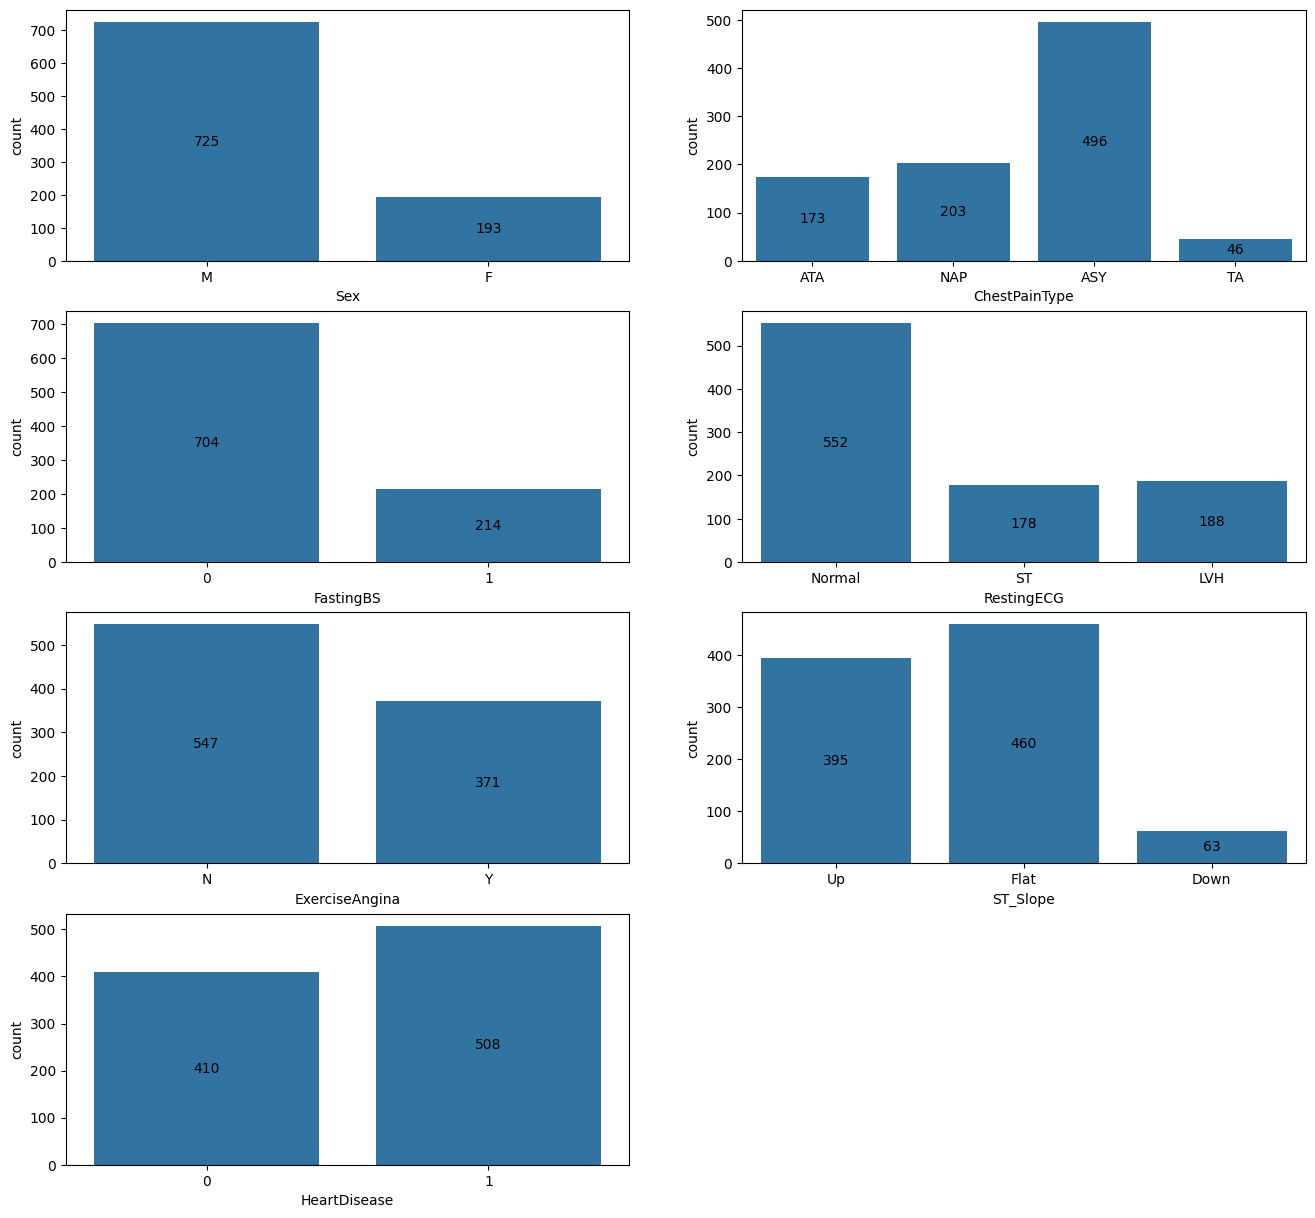

In [6]:
# Visualization categorical variables
categorical_cols = ["Sex", "ChestPainType", "FastingBS", "RestingECG", "ExerciseAngina", "ST_Slope", "HeartDisease"]

fig = plt.figure(figsize=(16,15))

for idx, col in enumerate(categorical_cols):
    ax = plt.subplot(4, 2, idx+1)
    sns.countplot(x=heart_df[col], ax=ax)
    # add data labels to each bar
    for container in ax.containers:
        ax.bar_label(container, label_type="center")

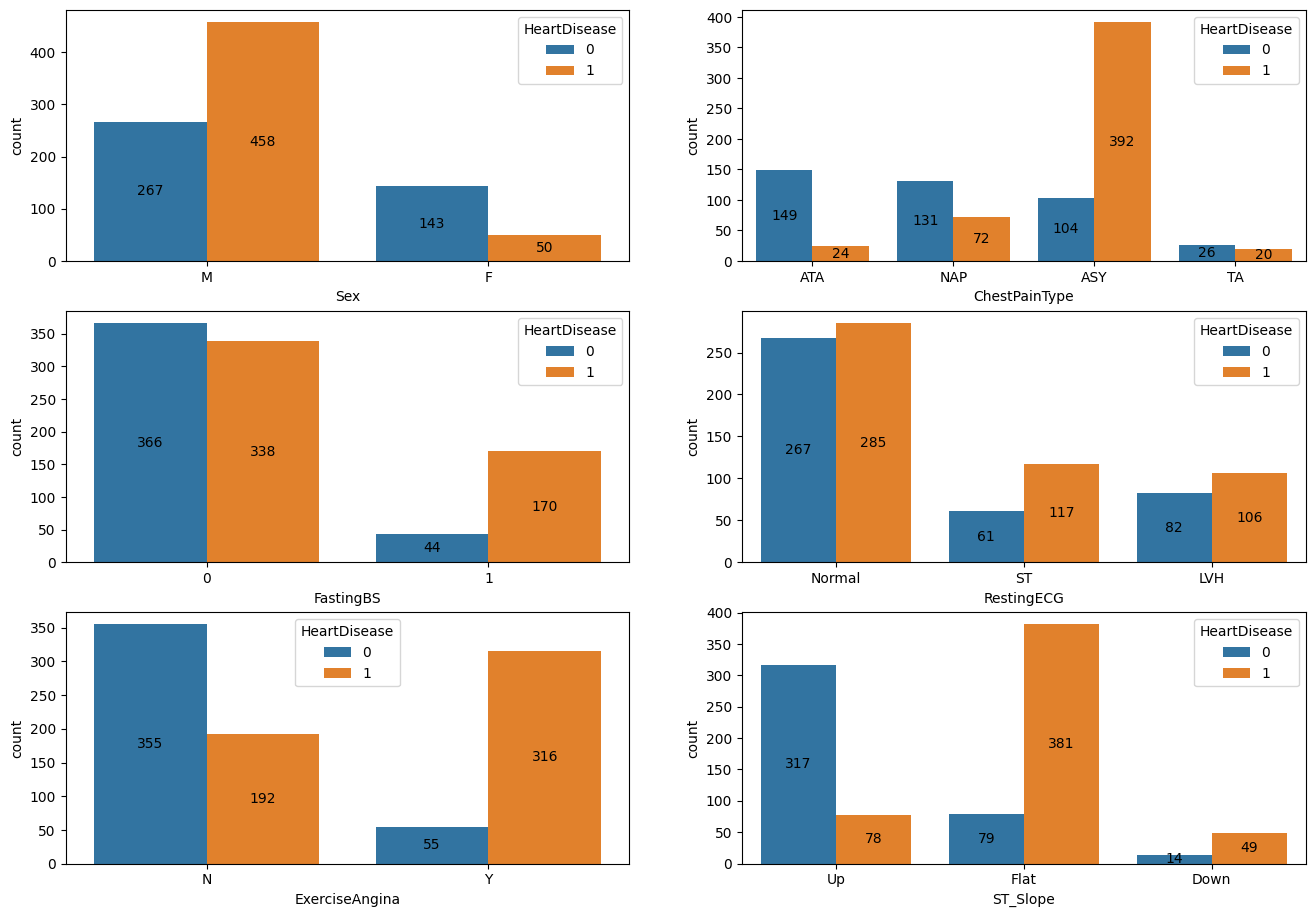

In [7]:
# How these categorical variables relate to the presence of heart disease
fig = plt.figure(figsize=(16,15))

for idx, col in enumerate(categorical_cols[:-1]):
    ax = plt.subplot(4, 2, idx+1)
    # group by HeartDisease
    sns.countplot(x=heart_df[col], hue=heart_df["HeartDisease"], ax=ax)
    # add data labels to each bar
    for container in ax.containers:
        ax.bar_label(container, label_type="center")

In [8]:
# Data cleaning  exploring RestingBP and Cholesterol variables, which both had minimum values of 0. Let's investigate these further:

heart_df[heart_df['RestingBP']==0].info()
heart_df[heart_df['RestingBP']==0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 449 to 449
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             1 non-null      int64  
 1   Sex             1 non-null      object 
 2   ChestPainType   1 non-null      object 
 3   RestingBP       1 non-null      int64  
 4   Cholesterol     1 non-null      int64  
 5   FastingBS       1 non-null      int64  
 6   RestingECG      1 non-null      object 
 7   MaxHR           1 non-null      int64  
 8   ExerciseAngina  1 non-null      object 
 9   Oldpeak         1 non-null      float64
 10  ST_Slope        1 non-null      object 
 11  HeartDisease    1 non-null      int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 104.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 449 to 449
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age     

In [9]:
# Now colesterol
heart_df[heart_df['Cholesterol']==0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 172 entries, 293 to 536
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             172 non-null    int64  
 1   Sex             172 non-null    object 
 2   ChestPainType   172 non-null    object 
 3   RestingBP       172 non-null    int64  
 4   Cholesterol     172 non-null    int64  
 5   FastingBS       172 non-null    int64  
 6   RestingECG      172 non-null    object 
 7   MaxHR           172 non-null    int64  
 8   ExerciseAngina  172 non-null    object 
 9   Oldpeak         172 non-null    float64
 10  ST_Slope        172 non-null    object 
 11  HeartDisease    172 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 17.5+ KB


In [10]:
# Clean our data: 1.Removing the one record with RestingBP = 0
# 2. Replacing Cholesterol = 0 values with the median Cholesterol value, calculated separately for patients with and without heart disease
df_clean = heart_df.copy()

# Remove the record with RestingBP = 0
df_clean = df_clean[df_clean["RestingBP"] != 0]

# Create a mask for patients without heart disease
heartdisease_mask = df_clean["HeartDisease"]==0

# Get cholesterol values for patients with and without heart disease
cholesterol_without_heartdisease = df_clean.loc[heartdisease_mask, "Cholesterol"]
cholesterol_with_heartdisease = df_clean.loc[~heartdisease_mask, "Cholesterol"]

# Replace cholesterol = 0 values with the median for the respective group
df_clean.loc[heartdisease_mask, "Cholesterol"] = cholesterol_without_heartdisease.replace(to_replace = 0, value = cholesterol_without_heartdisease.median())
df_clean.loc[~heartdisease_mask, "Cholesterol"] = cholesterol_with_heartdisease.replace(to_replace = 0, value = cholesterol_with_heartdisease.median())

# Verify our cleaning worked
df_clean[["Cholesterol", "RestingBP"]].describe()

,Cholesterol,RestingBP
count,917.000000,917.000000
mean,239.700109,132.540894
std,54.352727,17.999749
min,85.000000,80.000000
25%,214.000000,120.000000
50%,225.000000,130.000000
75%,267.000000,140.000000
max,603.000000,200.000000


In [11]:
# One-hot encode categorical variables prepare it for our machine learning model.
#  K-Nearest Neighbors requires numeric input, so we'll need to convert our categorical variables.
# We'll use one-hot encoding to transform these variables into numeric form:
df_clean = pd.get_dummies(df_clean, drop_first=True)
df_clean.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True


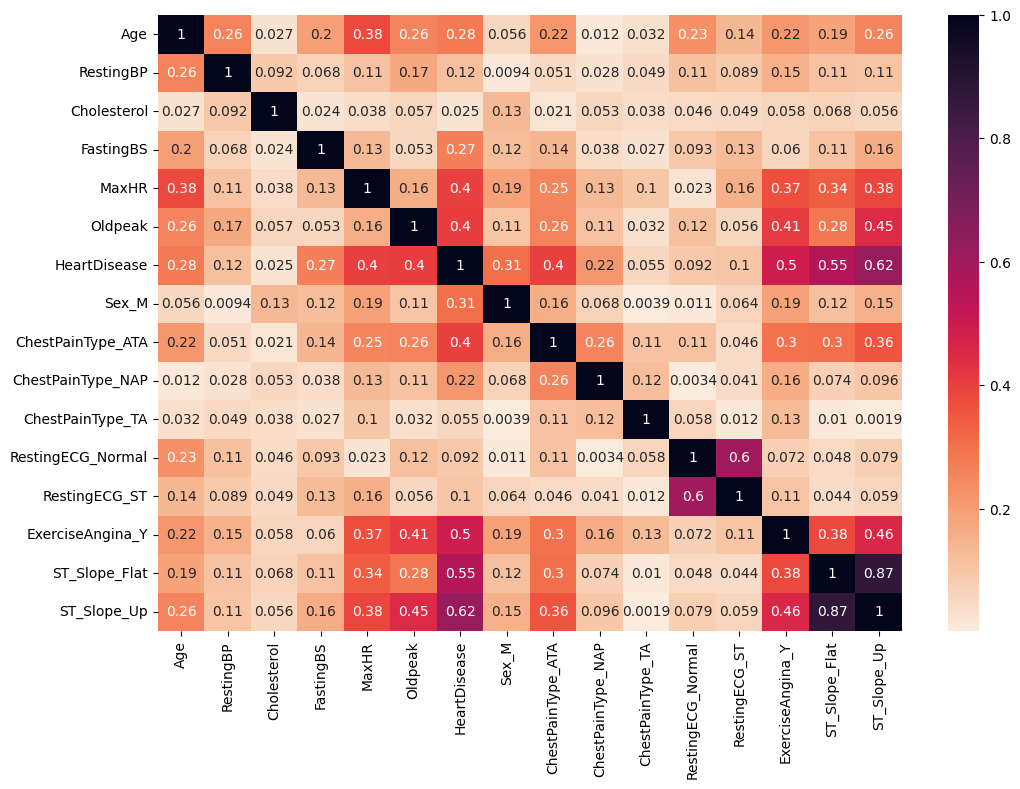

In [13]:
#  analyze the correlations between our features and the target variable 
# to identify the most important predictors:
correlations = abs(df_clean.corr())
plt.figure(figsize=(12,8))
sns.heatmap(correlations, annot=True, cmap="rocket_r")
plt.show()

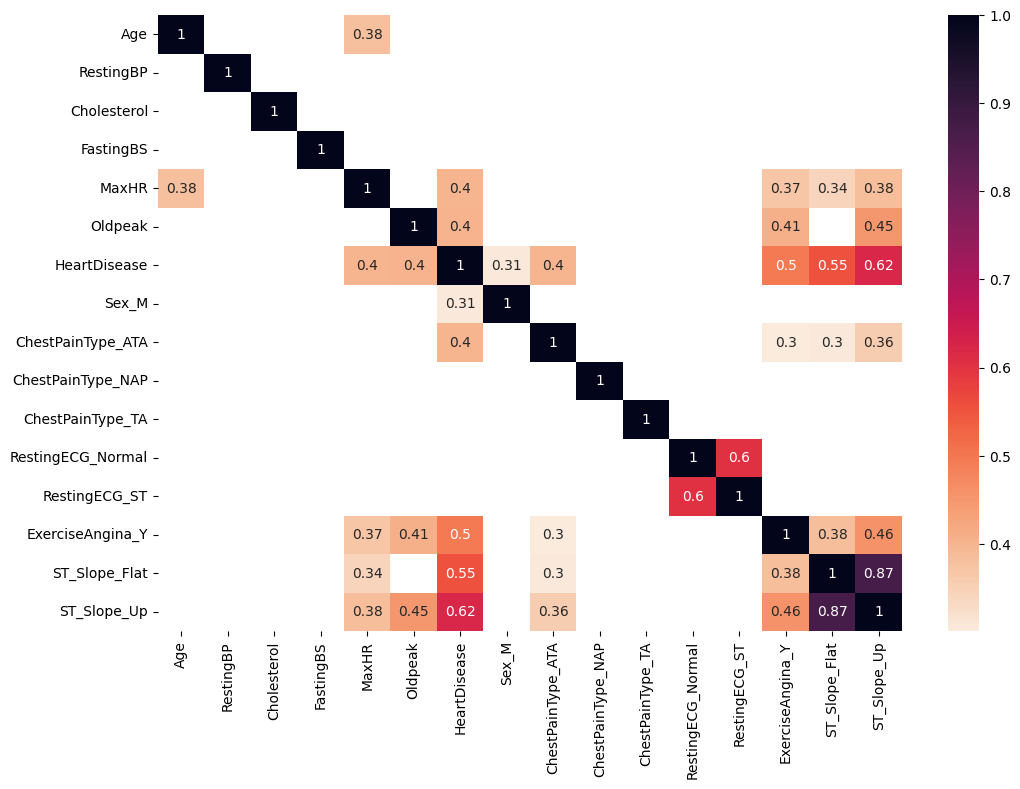

In [14]:
# Filter to show only strong correlations
plt.figure(figsize=(12,8))
sns.heatmap(correlations[correlations > 0.30], annot=True, cmap="rocket_r")
plt.show()

In [16]:
# 
# Split data into training and validation sets
from sklearn.neighbors import KNeighborsClassifier
X = df_clean.drop(["HeartDisease"], axis=1)
y = df_clean["HeartDisease"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=417)

features = [
    "MaxHR",
    "Oldpeak",
    "Sex_M",
    "ExerciseAngina_Y",
    "ST_Slope_Flat",
    "ST_Slope_Up"
]

for feature in features:
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train[[feature]], y_train)
    accuracy = knn.score(X_val[[feature]], y_val)
    print(f"The k-NN classifier trained on {feature} and with k = 3 has an accuracy of {accuracy*100:.2f}%")

The k-NN classifier trained on MaxHR and with k = 3 has an accuracy of 55.07%
The k-NN classifier trained on Oldpeak and with k = 3 has an accuracy of 58.70%
The k-NN classifier trained on Sex_M and with k = 3 has an accuracy of 61.59%
The k-NN classifier trained on ExerciseAngina_Y and with k = 3 has an accuracy of 73.19%
The k-NN classifier trained on ST_Slope_Flat and with k = 3 has an accuracy of 81.88%
The k-NN classifier trained on ST_Slope_Up and with k = 3 has an accuracy of 55.07%


In [18]:
# Scale the features to the same range
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[features])
X_val_scaled = scaler.transform(X_val[features])

# Build and evaluate the model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
accuracy = knn.score(X_val_scaled, y_val)
print(f"Accuracy: {accuracy*100:.2f}")

Accuracy: 83.33


In [20]:
# Prepare data for final model
from sklearn.model_selection import GridSearchCV
X = df_clean.drop(["HeartDisease"], axis=1)
y = df_clean["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=417)

features = [
    "Oldpeak",
    # "Sex_M",  # Testing whether this feature helps or hinders accuracy
    "ExerciseAngina_Y",
    "ST_Slope_Flat",
    "ST_Slope_Up"
]

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[features])

# Define hyperparameter grid
grid_params = {"n_neighbors": range(1, 20),
               "metric": ["minkowski", "manhattan"]
              }

# Perform grid search
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, grid_params, scoring='accuracy')
knn_grid.fit(X_train_scaled, y_train)

# Display best parameters
print(f"Best score: {knn_grid.best_score_*100:.2f}%")
print(f"Best parameters: {knn_grid.best_params_}")

Best score: 82.16%
Best parameters: {'metric': 'minkowski', 'n_neighbors': 19}


In [22]:
# Scale test data
from sklearn.metrics import accuracy_score
X_test_scaled = scaler.transform(X_test[features])

# Make predictions on test set
predictions = knn_grid.best_estimator_.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy on test set: {accuracy*100:.2f}%")

Model Accuracy on test set: 85.51%


In [23]:
# Check distribution of Sex_M
print("Distribution of patients by their sex in the entire dataset")
print(X.Sex_M.value_counts())

print("\nDistribution of patients by their sex in the training dataset")
print(X_train.Sex_M.value_counts())

print("\nDistribution of patients by their sex in the test dataset")
print(X_test.Sex_M.value_counts())

Distribution of patients by their sex in the entire dataset
Sex_M
True     724
False    193
Name: count, dtype: int64

Distribution of patients by their sex in the training dataset
Sex_M
True     615
False    164
Name: count, dtype: int64

Distribution of patients by their sex in the test dataset
Sex_M
True     109
False     29
Name: count, dtype: int64


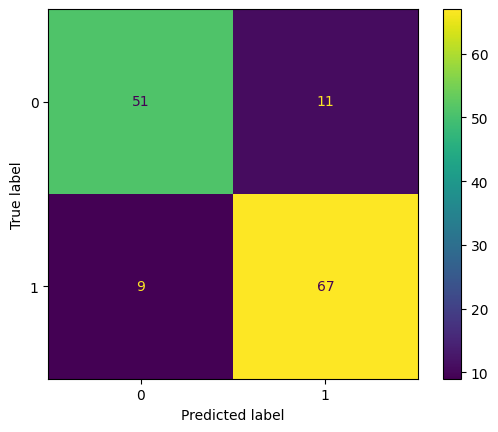

In [27]:
# Evaluate confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(cf).plot()
plt.show()